### 문제 정의
- 머신러닝을 통해서 어떤 문제를 해결할 것인가?
- 지도 vs 비지도 vs 강화
- 지도학습 - 분류
- 비만을 판단하는 모델

### 데이터 수집
- csv 파일로 이루어진 데이터 수집
- 500명의 성별, 키, 몸무게, 비만도 등급

In [2]:
import pandas as pd
bmi = pd.read_csv('./data/bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


### 데이터 전처리
- 결측치 처리 : 비어있는 데이터를 채워주기
- 이상치 처리 : 정상적인 범위를 벗어난 데이터 수정하기

#### 결측치 확인
- info() 함수 사용

In [3]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


#### 이상치 확인
- describe() : 수치형 데이터만 분석가능

In [4]:
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 탐색적 데이터 분석(EDA) = Exploratory Data Analysis)
- 데이터 자세히 살펴보기
- 비만도별로 데이터가 잘 나뉘어져 있는지

#### 비만도 등급 확인

In [5]:
# 중복 제거하고 값을 확인
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

#### Label이 Weak인 사람들만 추리기

In [8]:
 bmi['Label'] == 'Weak'

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Label, Length: 500, dtype: bool

In [11]:
# 불리언 인덱싱
bolWeak = bmi['Label'] == 'Weak'
scatter_data = bmi.loc[bolWeak]
scatter_data

,Gender,Height,Weight,Label
27,Male,187,62,Weak
31,Male,178,52,Weak
32,Female,195,65,Weak
51,Female,176,54,Weak
98,Male,195,69,Weak
200,Male,184,57,Weak
242,Male,191,62,Weak
269,Male,168,50,Weak
279,Male,188,57,Weak
280,Male,193,65,Weak


#### Weak인 사람들을 그래프로 그리기

In [13]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

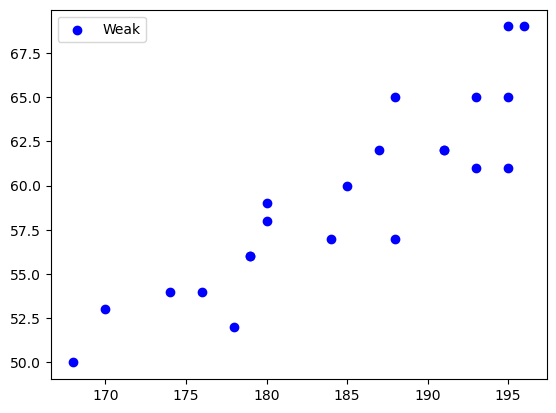

In [16]:
# plt.scatter(x,y)
plt.scatter(scatter_data['Height'], scatter_data['Weight'],
            color='blue', label='Weak')
plt.legend() # 차트에서 그린 label 출력
plt.show

#### OverWeight 그래프 그리기
- 초록색으로 그리기

<function matplotlib.pyplot.show(close=None, block=None)>

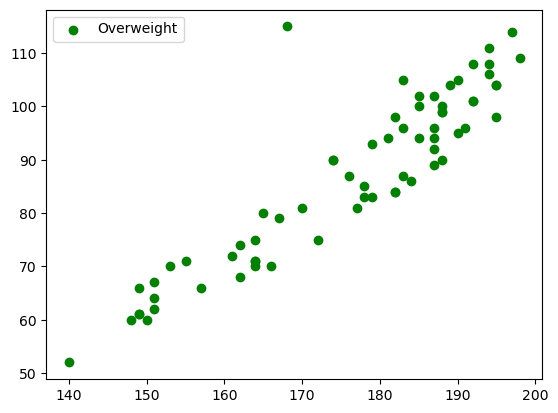

In [39]:
bolOver = bmi['Label'] == 'Overweight'
scatter_data = bmi.loc[bolOver]

plt.scatter(scatter_data['Height'],scatter_data['Weight'],
           color='green', label = 'Overweight')
plt.legend()
plt.show

#### 함수로 만들어서 그래프 그리기

In [51]:
def myScatter(label,color):
    bol = bmi['Label'] == label
    scatter_data = bmi.loc[bol]
    plt.scatter(scatter_data['Height'],scatter_data['Weight'],
    color = color, label = label)

#### 전체 그래프 그리기

In [52]:
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

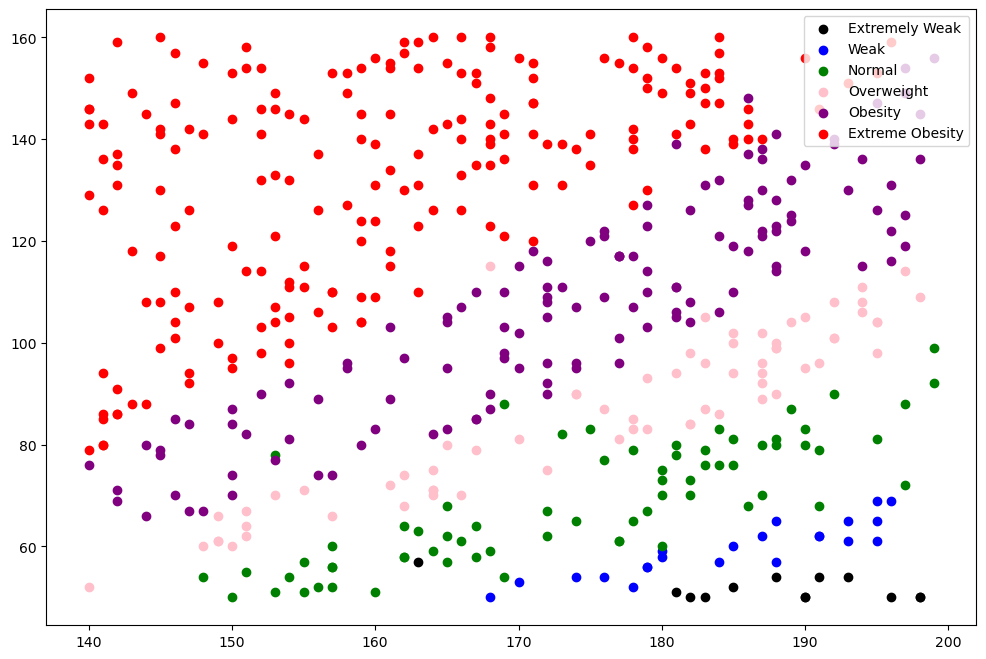

In [53]:
# 그래프 크기 조정
plt.figure(figsize=(12,8))

myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')
plt.legend()
plt.show()

In [55]:
bmi.loc[bmi['Weight']==78]

,Gender,Height,Weight,Label
165,Male,181,78,Normal
231,Female,153,78,Normal
234,Male,145,78,Obesity


In [56]:
bmi.loc[231,'Label'] = 'Obesity'

In [57]:
bmi.loc[231,'Label']

'Obesity'

### 모델 선택 및 하이퍼 파라미터 튜닝
- 머신러닝 모델을 불러와서 사용하는 단계
- 머신러닝 모델의 학습에 변화를 주고 싶다 - 하이퍼 파라미터 튜닝
- 하이퍼 파라미터 = 수정 가능한 파라미터

#### 모델 로드
- KNN 모델 : 머신러닝 모델

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn_bmi = KNeighborsClassifier(n_neighbors=5) #짝수는 지향하지 않음


#### 문제와 정답 분리

In [63]:
# 문제 = Height, Weight
X = bmi.loc[:,'Height':'Weight']


# 정답 = Label
y = bmi.loc[:,'Label']

#### 훈련(train)과 평가(test)
- 훈련 : 평가 = 7 : 3

In [64]:
X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

##### 훈련,평가 데이터 분리 함수

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [66]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 2), (150, 2), (350,), (150,))

### 학습

In [67]:
# fit(문제,정답)
# KNN 모델 BMI데이터를 학습 > BMI 데이터에 대한 규칙을 찾음
# X 데이러(Height,Weight)를 통해서 y데이터(Label)의 규칙을 찾음
knn_bmi.fit(X_train,y_train)

KNeighborsClassifier()

### 평가
- 모델이 제대로 만들어졌는지 평가 = score
- 새로운 데이터에 대해서 예측 = predict

In [68]:
# 예측
# predict(문제)
# 문제는 2차원 데이터
knn_bmi.predict([[174,68]])

C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['Normal'], dtype=object)

In [71]:
# 만들어진 모델을 평가
# score(문제데이터, 정답데이터)
# X_test가 예측한 정답과 정답 데이터(y_test)를 비교
knn_bmi.score(X_test,y_test)

C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9

In [72]:
# 학습을 할 때 사용된 데이터이기 때문에 test데이터보다 score값이 높음
knn_bmi.score(X_train,y_train)

C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9342857142857143

### 하이퍼 파라미터 튜닝
- KNN 모델의 하이퍼 파라미터(n_neighbors)의 변화에 따라 score 값을 확인

In [74]:
# 점수를 저장할 list 생성
train_acc = []
test_acc = []

# n_neighbors를 1 ~ 30 Rkw 돌림
for i in range(1,31):
    # n_neighbors를 변경해가면서 모델 생성
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # 생성된 모델에 학습
    knn.fit(X_train,y_train)
    
    # 만들어진 규칙으로 score 값 저장
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))
    
    #print(f"{i}번째 score : {knn.score(X_test,y_test)}") 

C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

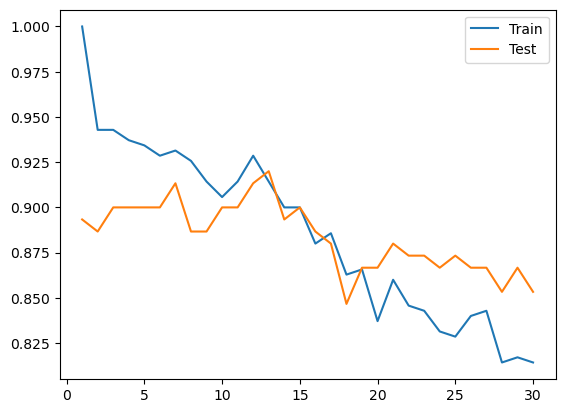

In [75]:
# x 축 = n_neighbors = range{1,31}
# y 축 = score
plt.plot(range(1,31), train_acc, label='Train')
plt.plot(range(1,31), test_acc, label = 'Test')
plt.legend()
plt.show()